# <a id='toc1_'></a>[T23 State Space Control - Part 1](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [T23 State Space Control - Part 1](#toc1_)    
  - [FSFB using LQR](#toc1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()
else:
    print('Basic file found')
from basic_material import *

j = complex(0,1)

from scipy.optimize import minimize
from scipy.signal import butter,bessel
from control.matlab import tf, ss, ss2tf, step, place, rlocus, lqr, lsim, ssdata
from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.3
Control Package Found
This is a library of basic functions for 16.06
This is a library of useful functions for the control systems in 16.06


## <a id='toc1_1_'></a>[FSFB using LQR](#toc0_)

In [ ]:
def FSFB_lqr(G,R,file_name='temp',w = np.logspace(-1,2,400),Tmax=1):
    nx = G.A.shape[0]
    t = linspace(0,Tmax,1000)
    
    k0,_,_ = lqr(G.A,G.B,G.C.reshape(nx,1)*G.C,R)
    k0 = np.asarray(k0)
    k1,_,_ = lqr(G.A,G.B,G.C.reshape(nx,1)*G.C,10*R)
    k1 = np.asarray(k1)
    #
    # For state space for G_c(s)
    #
    # find the feedforward gains
    Nbar0 = compute_Nbar(G,k0)
    Nbar1 = compute_Nbar(G,k1)

    sys0 = ss(G.A-G.B @ k0,G.B*Nbar0,G.C,G.D)
    sys1 = ss(G.A-G.B @ k1,G.B*Nbar1,G.C,G.D)

    print(f"Nbar0 = {Nbar0:.3f}")
    print(f"Nbar1 = {Nbar1:.3f}")
    print(f"{k0 = }")
    print(f"{k1 = }")

    if nx < 4:
        w = np.logspace(-1,2,400)
    else:
        w = np.logspace(-1,2,400)
    Gf = G(w*j)
    sys0f = sys0(j*w)
    sys1f = sys1(j*w)

    t = np.arange(0,Tmax,.01)    
    y0,t0 = control.matlab.step(sys0,T=t)
    y1,t1 = control.matlab.step(sys1,T=t)

    _, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
    ax.plot(t0,y0,'b-',label=r'$y_0$'+f" {R =:5.3f}")
    ax.plot(t1,y1,'g--',label=r'$y_1$'+f" {10*R =:5.3f}")
    plt.legend()
    plt.text(max(t0)/2,.8,f"{Nbar0 =:3.1f}", fontsize=16)
    if nx < 4:
        plt.text(max(t0)/2,.3,[', '.join('{:6.3f}'.format(i) for i in np.squeeze(k0))])
    plt.ylabel("Response")
    plt.xlabel("Time")
    savefig("figs/FSFB"+file_name+"_0.pdf", dpi=600)
    plt.show()

    ymax = max(np.max(np.abs(Gf)),np.max(np.abs(sys0f)),np.max(np.abs(sys1f)))
    ymax = 10**np.ceil(np.log10(1.5*ymax))
    fig, ax = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
    ax[0].loglog(w,np.abs(Gf),'b',label=r'G')
    ax[1].semilogx(w,np.unwrap(np.angle(Gf))*r2d,'b',label=r'G')
    ax[0].loglog(w,np.abs(sys0f),'g',label=r'sys0'+f" {R =:5.3f}")
    ax[1].semilogx(w,np.unwrap(np.angle(sys0f))*r2d,'g',label=r'sys0'+f" {R =:5.3f}")
    ax[0].loglog(w,np.abs(sys1f),'r',label=r'sys1'+f" {10*R =:5.3f}")
    ax[1].semilogx(w,np.unwrap(np.angle(sys1f))*r2d,'r',label=r'sys1'+f" {10*R =:5.3f}")

    ax[1].set_xlabel('Freq [r/s]')
    ax[0].set_ylabel('Mag')
    ax[1].set_ylabel('Phase (degs)')
    ax[0].grid(True, which="both", ls="-",color='0.65')
    ax[1].grid(True, which="both", ls="-",color='0.65')
    ax[0].axhline(y=1,c='k',ls='--')
    ax[1].axhline(y=-180,c='k',ls='--')
    ax[0].legend()
    ax[0].set_ylim(1e-3,ymax)
    savefig("figs/FSFB"+file_name+"_1.pdf", dpi=600)
    plt.show()

    return k0

Nbar0 = 10.050
Nbar1 = 3.317
k0 = array([[  22.264,  1182.911,  20271.721]])
k1 = array([[   8.168,  376.421,  5189.240]])


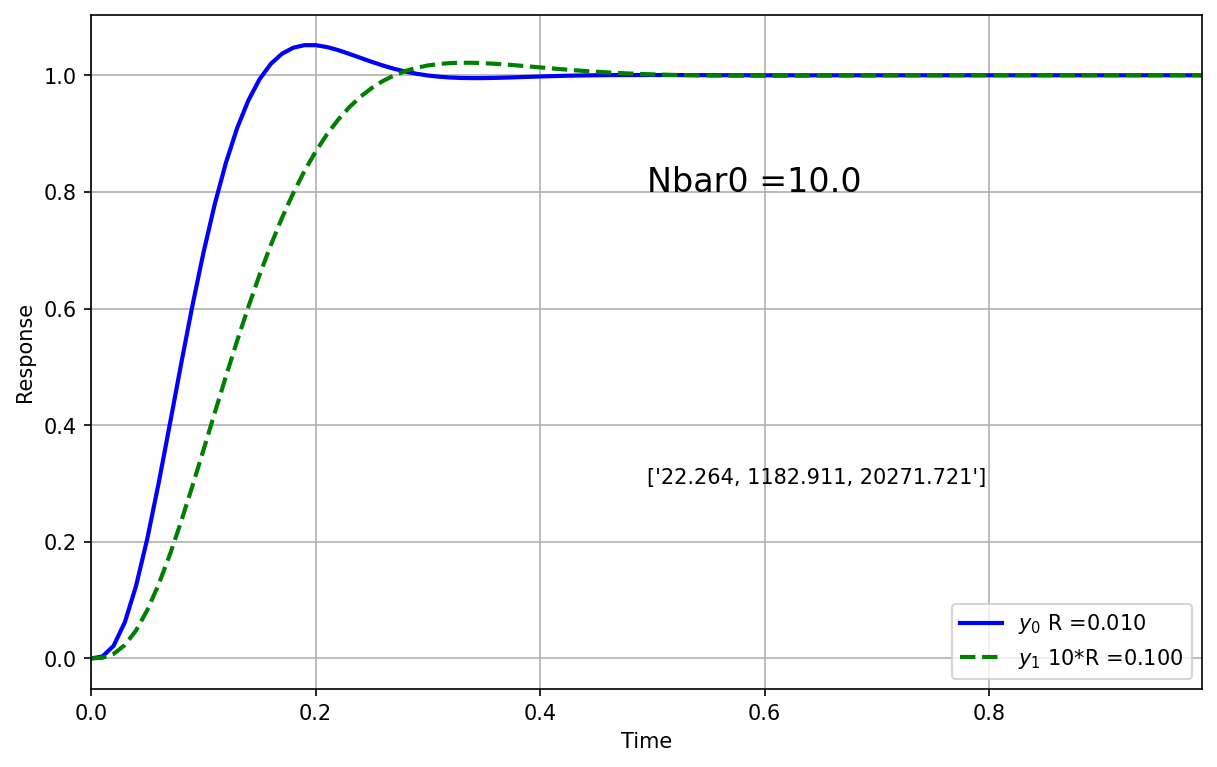

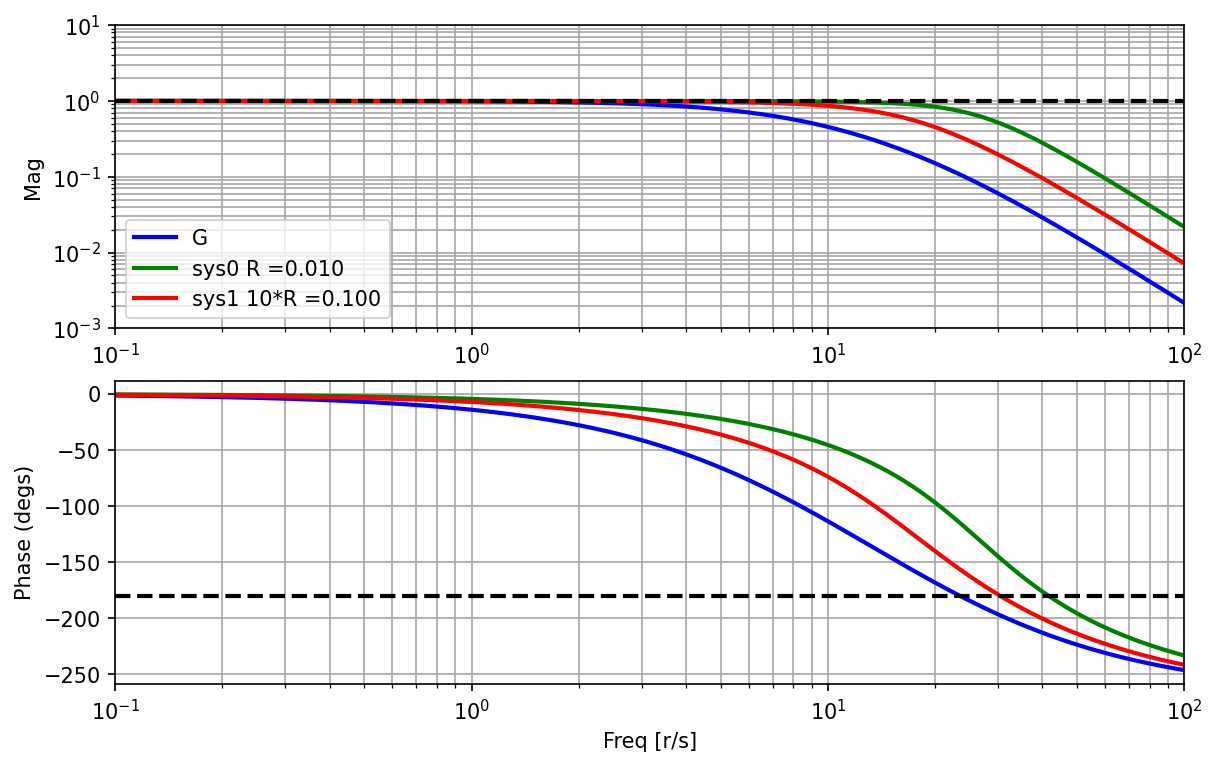

In [ ]:
G1 = ss(tf(8*14*20,np.convolve([1, 8],np.convolve([1, 14],[1, 20]))))
R = 1e-2
file_name = 'examp1'
K1 = FSFB_lqr(G1,R,file_name=file_name)

Nbar0 = 3.162
Nbar1 = 1.000
k0 = array([[   2.450,    3.002]])
k1 = array([[   1.393,    0.970]])


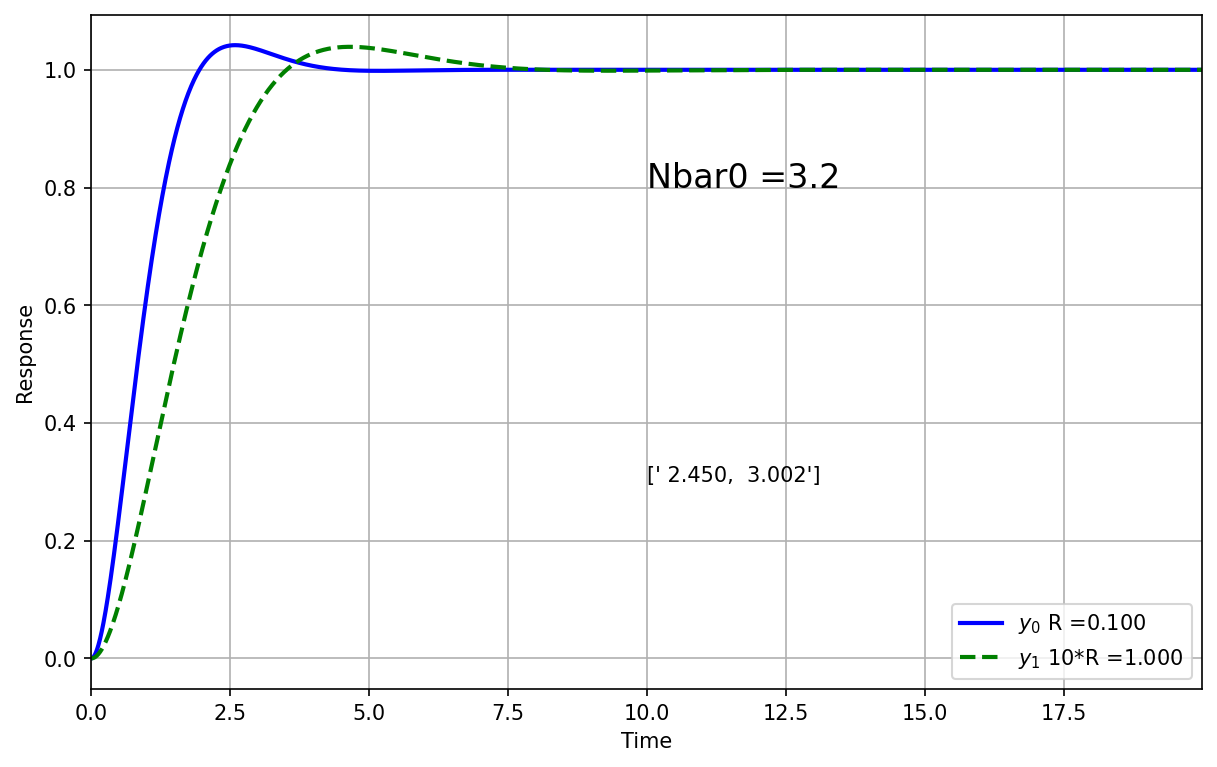

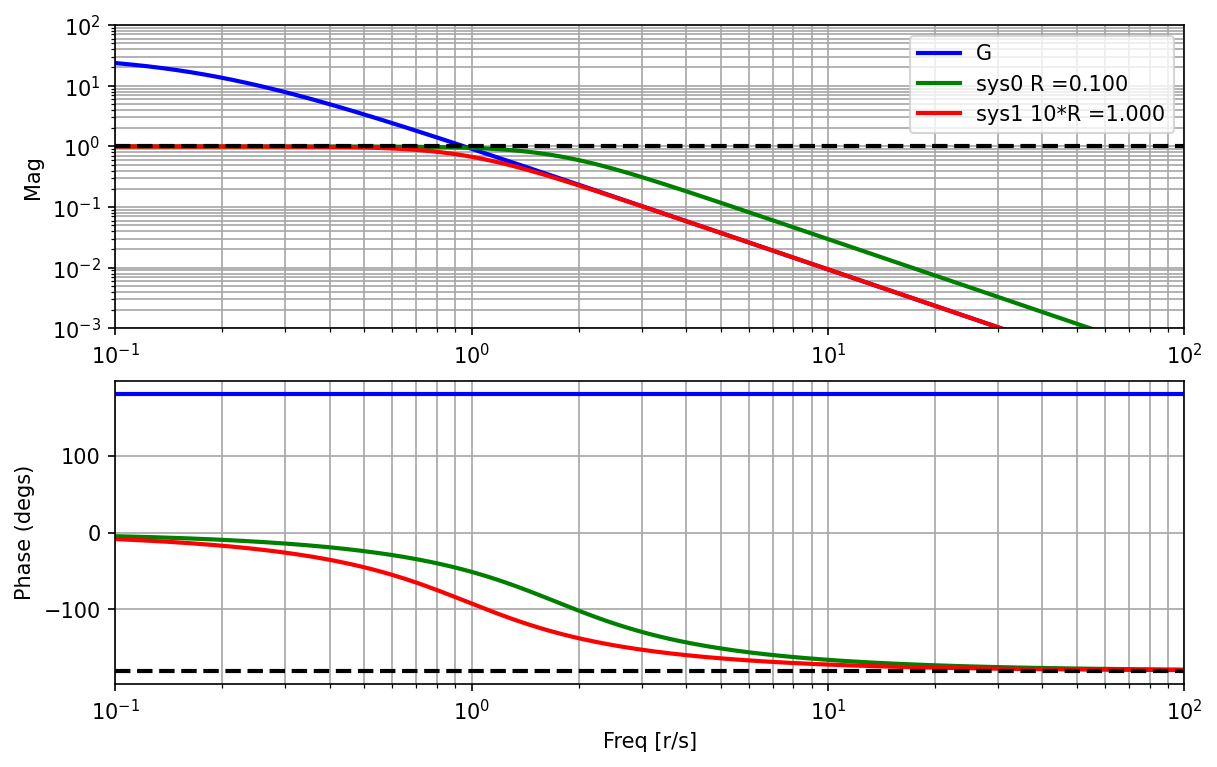

In [ ]:
G2 = ss(tf(0.94,(1,0,-0.0297)))
R = 0.1
file_name = 'examp2'
K2 = FSFB_lqr(G2,R,file_name=file_name,Tmax=20)

Nbar0 = 10.050
Nbar1 = 3.317
k0 = array([[ 106.264,  1182.911,  24751.721]])
k1 = array([[  92.168,  376.421,  9669.240]])


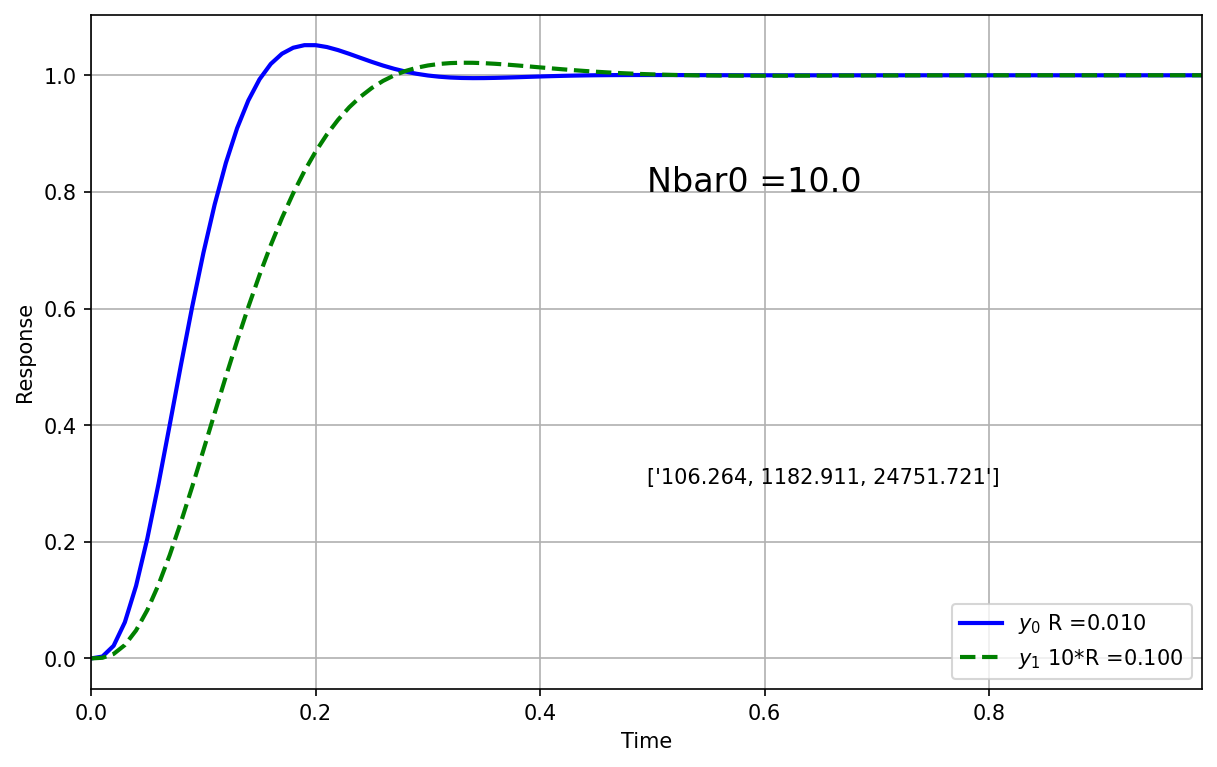

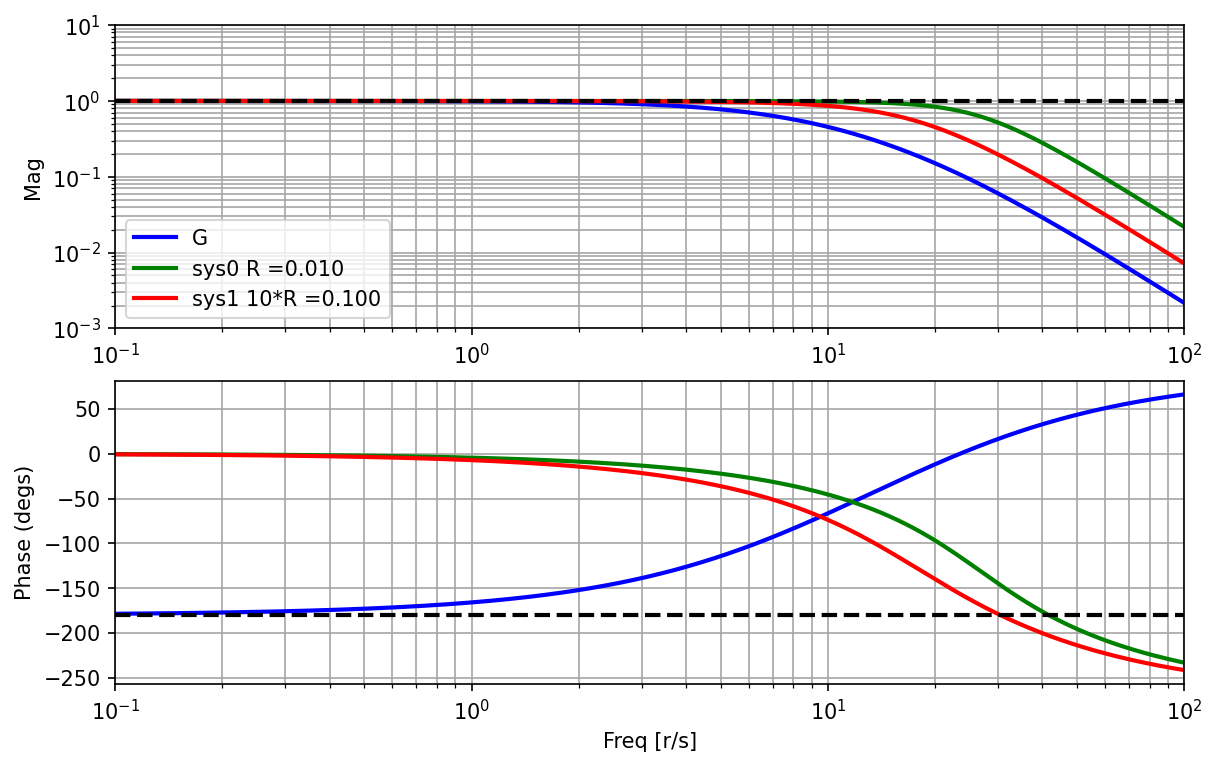

In [ ]:
G3 = ss(tf(8*14*20,np.convolve([1, -8],np.convolve([1, -14],[1, -20]))))
R = 1e-2
file_name = 'examp3'
K3 = FSFB_lqr(G3,R,file_name=file_name)


Nbar0 = -4.359
Nbar1 = -3.162
k0 = array([[   7.359,    7.359]])
k1 = array([[   6.162,    6.162]])


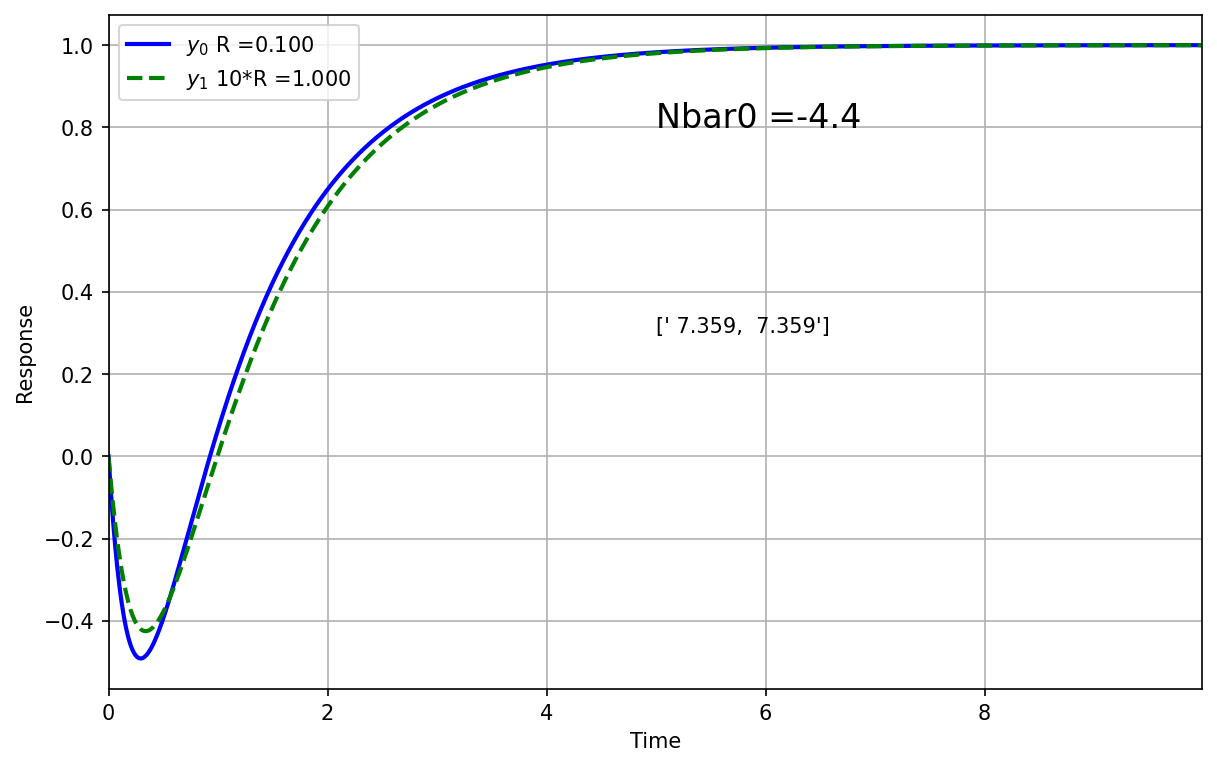

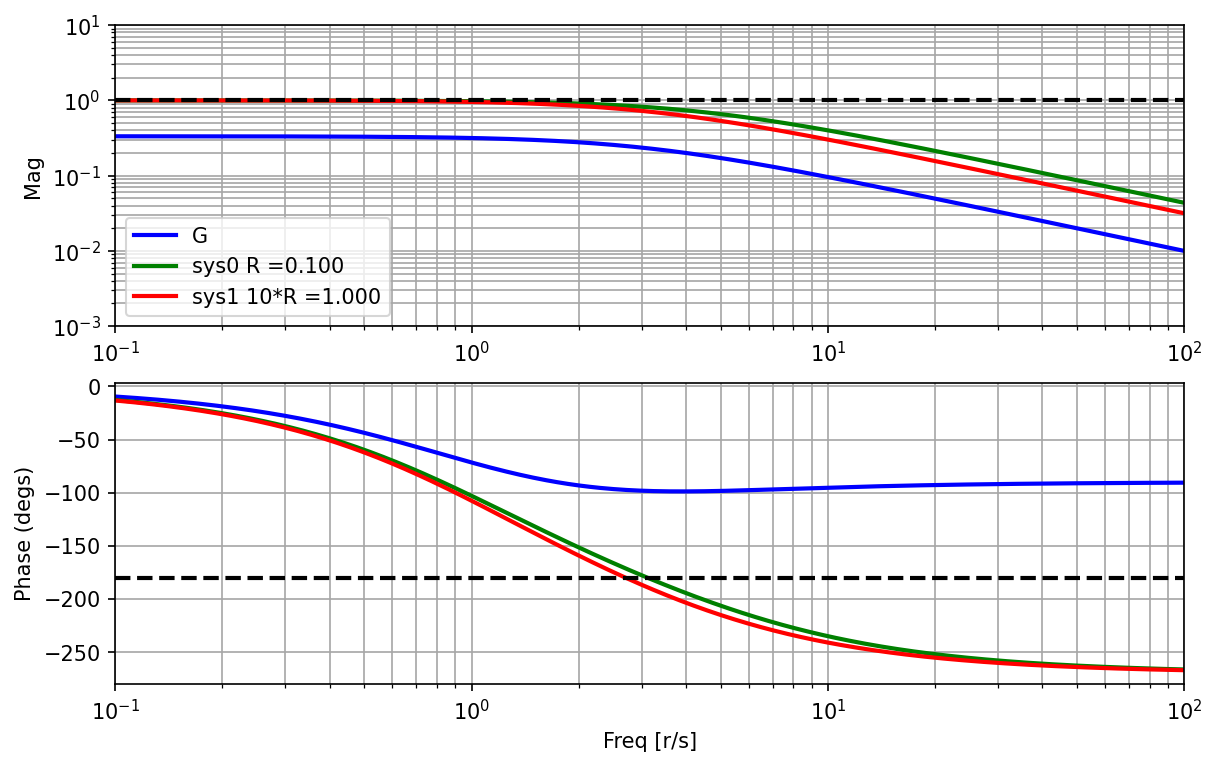

In [ ]:
G4 = ss(tf((1,-1),(1,-2,-3)))
R = 0.1
file_name = 'examp4'
K4 = FSFB_lqr(G4,R,file_name=file_name,Tmax=10)

Nbar0 = 3.162
Nbar1 = 1.000
k0 = array([[  10.087,   18.595,   64.139,   60.990,   62.394,   25.298]])
k1 = array([[   9.156,   12.614,   47.014,   27.987,   25.686,    8.000]])


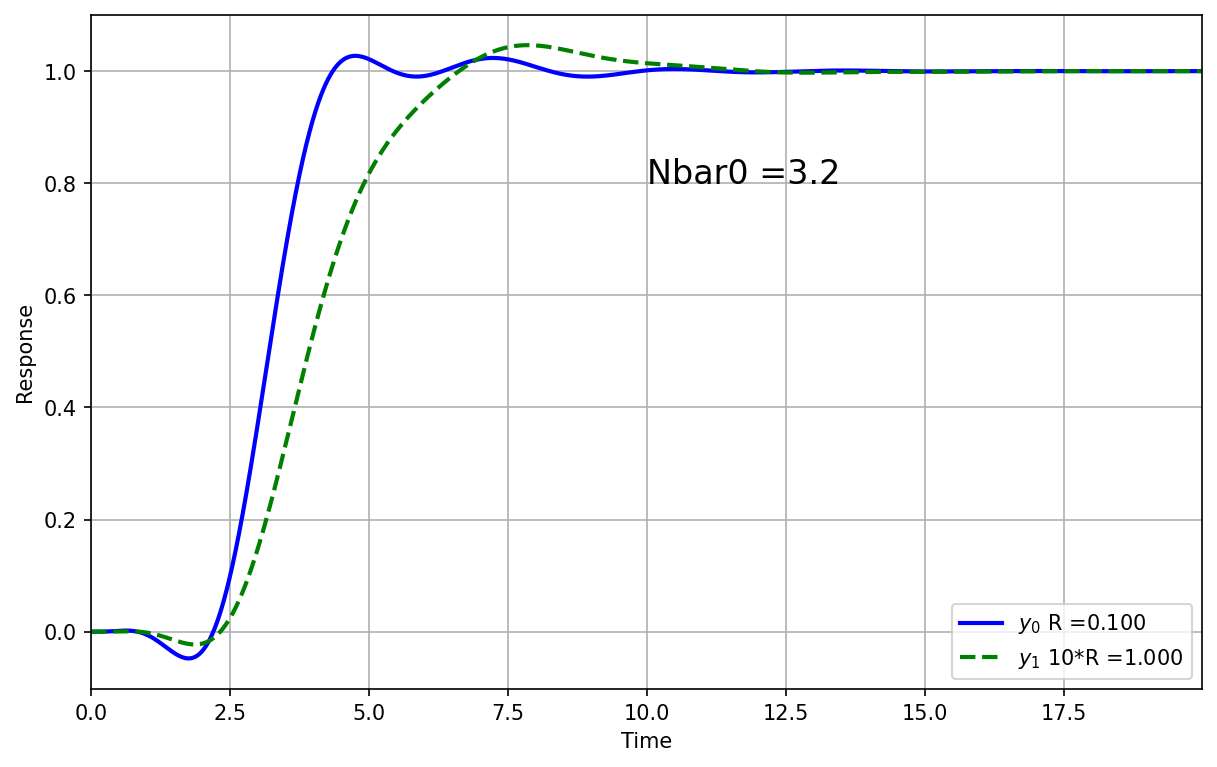

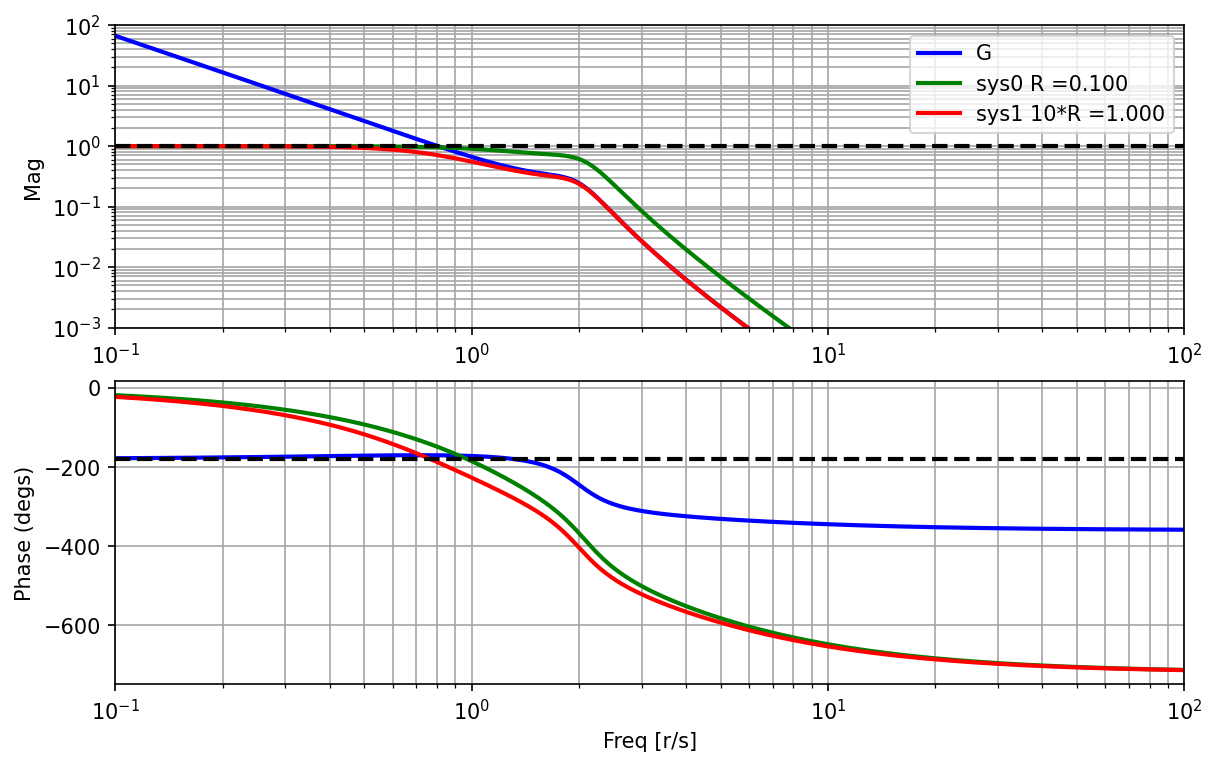

In [ ]:
G5 = ss(tf((1,-6,8),np.convolve([1,0,0],np.convolve([1,.8,4],[1,-4,3]))))
R = 0.1
file_name = 'examp5'
K5 = FSFB_lqr(G5,R,file_name=file_name,Tmax=20)